<a href="https://colab.research.google.com/github/007jayesh/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day (Ordinal,Categorical)
* ### Rented Bike count - Count of bikes rented at each hour (Numerical)
* ### Hour - Hour of the day ()
* ### Temperature-Temperature in Celsius (Numerical)
* ### Humidity - % (Numerical)
* ### Windspeed - m/s (Numerical)
* ### Visibility - 10m (Numerical)
* ### Dew point temperature - Celsius (Numerical)
* ### Solar radiation - MJ/m2 (Numerical)
* ### Rainfall - mm (Numerical)
* ### Snowfall - cm (Numerical)
* ### Seasons - Winter, Spring, Summer, Autumn (Categorical)
* ### Holiday - Holiday/No holiday (Categorical)
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours) (Categorical)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/My Drive/Capstone Regression"

/content/drive/My Drive/Capstone Regression


In [4]:
!ls

'Bike Sharing Demand Prediction - Capstone Project.ipynb'   SeoulBikeData.csv


In [5]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#checking the first 10 Rows
df1 = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape') 
df1.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [7]:
#checking the last 5 Rows
df1.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
df=df1

In [9]:
df = df.rename(columns= {'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [10]:
#printing total rows and Columns
df.shape

(8760, 14)

In [11]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [12]:
# Checking the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               8760 non-null   object 
 1   Rented Bike Count  8760 non-null   int64  
 2   Hour               8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_day           8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [13]:
# Checking null values of data 
df.isna().sum()

Date                 0
Rented Bike Count    0
Hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
dtype: int64

In [14]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [15]:
df['Date'] =  pd.to_datetime(df['Date'])

In [16]:
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month

df['weekday'] = df['Date'].dt.weekday
df["Week"]=df["Date"].dt.week%4
df["WeekOfYear"]=df["Date"].dt.week

In [17]:
print(df['weekday'].unique())

[3 6 2 4 0 5 1]


In [18]:
df = df.drop(columns = ['Date'], axis = 1)

In [19]:
# Updated dataset
df.head()

,Rented Bike Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,Year,Month,weekday,Week,WeekOfYear
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3,2,2
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3,2,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3,2,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3,2,2
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,3,2,2


In [20]:
print(df['Month'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [21]:
df['Month'] = df['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})


In [22]:
df.head()

,Rented Bike Count,Hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,Year,Month,weekday,Week,WeekOfYear
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,3,2,2
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,3,2,2
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,3,2,2
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,3,2,2
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,January,3,2,2


#Exploring Numerical Features

In [23]:
#appending numerical variables in a list
numerical_variables=[]
for i in df.columns:
    if df[i].dtypes != 'O' and i not in ['Rented Bike Count','Hour','Year','Month', 'weekday','Week','WeekOfYear' ]:
        numerical_variables.append(i)
numerical_variables

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

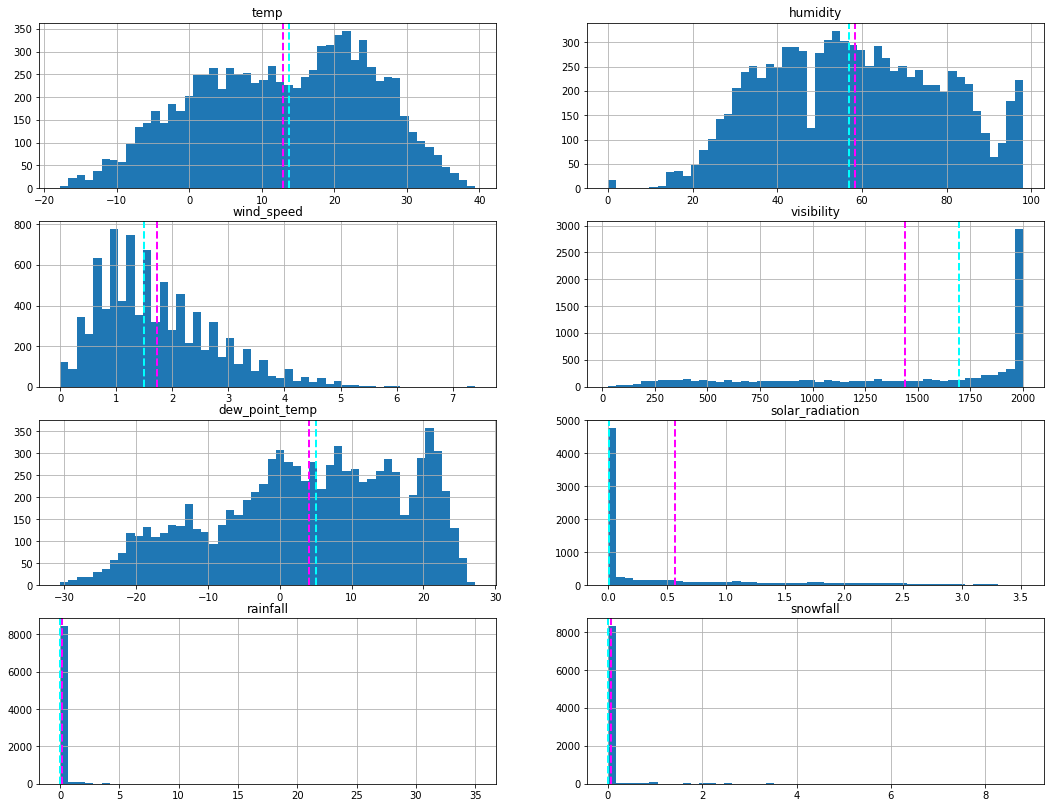

In [32]:
n=1
fig = plt.figure(figsize=(18, 14))
for col in numerical_variables[0:]:
    plt.subplot(4,2,n)
    n=n+1
    
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [76]:
numerical_variables

['temp',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall']

Text(0.5, 1.0, 'Temp vs. Rented Bikes Count')

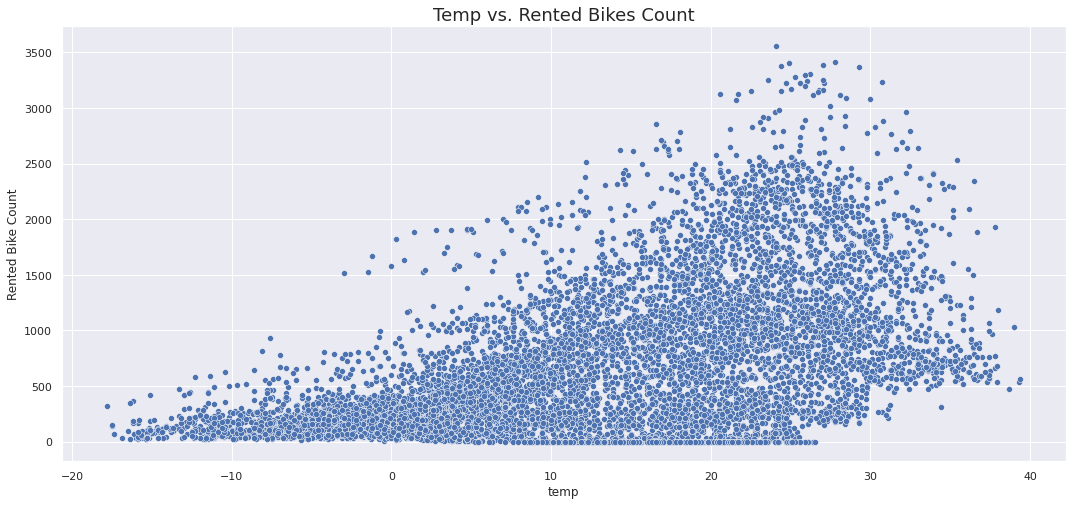

In [89]:
import seaborn
seaborn.set(style='whitegrid')
sns.set(rc = {'figure.figsize':(18,8)})
Bike_vs_temp=seaborn.scatterplot(x="temp",
                    y="Rented Bike Count",
                    data=df)
Bike_vs_temp.set_title("Temp vs. Rented Bikes Count",fontsize=18)



Text(0.5, 1.0, 'Humidity vs. Rented Bikes Count')

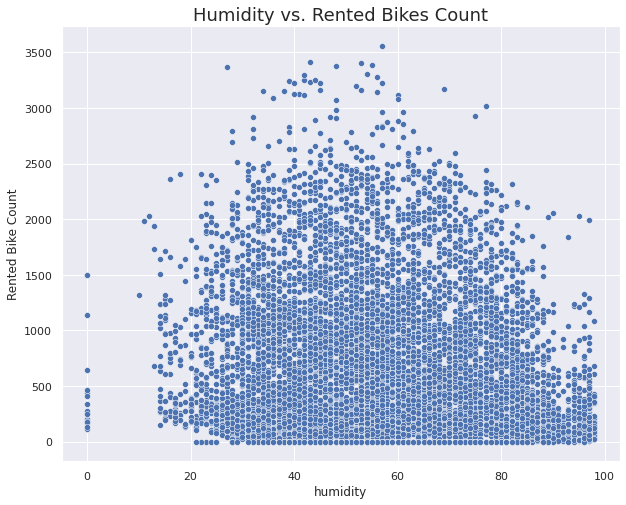

In [90]:
seaborn.set(style='whitegrid')
sns.set(rc = {'figure.figsize':(10,8)})
Bike_vs_humidity=seaborn.scatterplot(x="humidity",
                    y="Rented Bike Count",
                    data=df)
Bike_vs_humidity.set_title("Humidity vs. Rented Bikes Count",fontsize=18)

Could not intrepret the relation between the humidity and Rented bike counts through scatter plot, let's try line plot to see if we can get any specific results

Text(0.5, 1.0, 'Humidity vs. Rented Bikes Count')

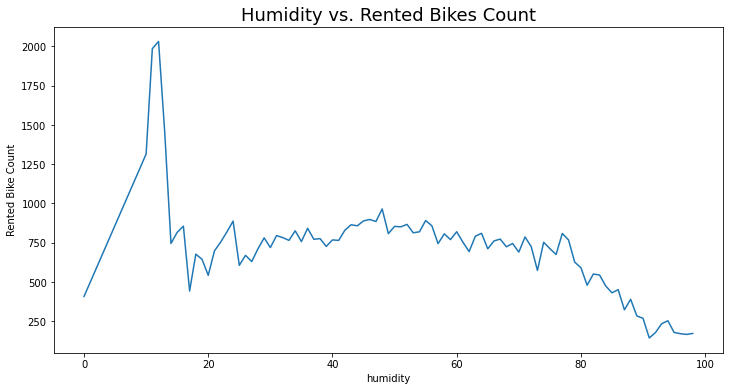

In [33]:
plt.figure(figsize=(12,6))
temp_df = df.groupby('humidity').mean()['Rented Bike Count']
x = sns.lineplot(data=temp_df)
x.set_title("Humidity vs. Rented Bikes Count",fontsize=18)

Text(0.5, 1.0, 'Wind vs. Rented Bikes Count')

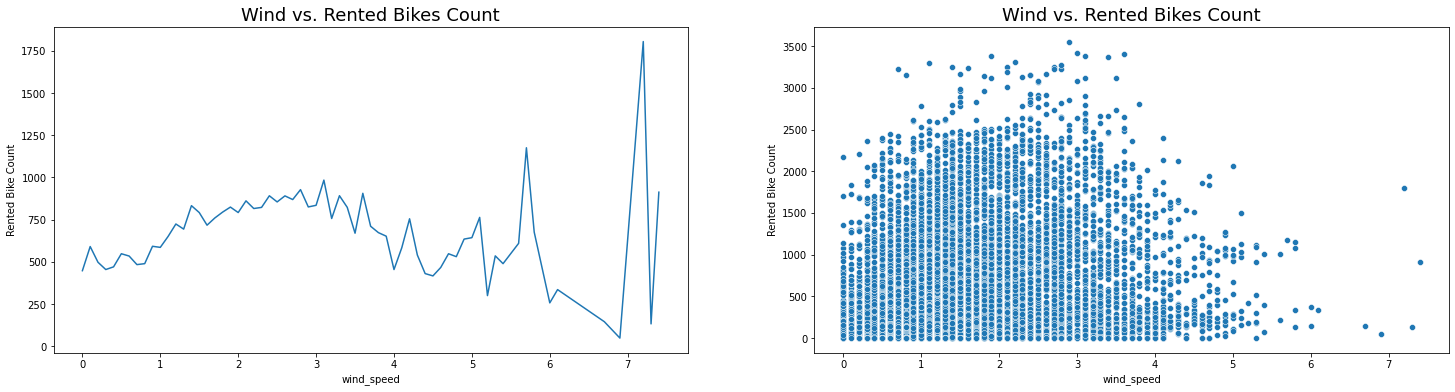

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
ax = axes.flatten()

temp_df = df.groupby('wind_speed').mean()['Rented Bike Count']
wind_vs_Bike = sns.lineplot(data=temp_df,ax=ax[0])
wind_vs_Bike.set_title("Wind vs. Rented Bikes Count",fontsize=18)

wind_vs_Bike1=sns.scatterplot(x="wind_speed",
                    y="Rented Bike Count",
                    data=df,ax=ax[1])
wind_vs_Bike1.set_title("Wind vs. Rented Bikes Count",fontsize=18)



Text(0.5, 1.0, 'Square root')

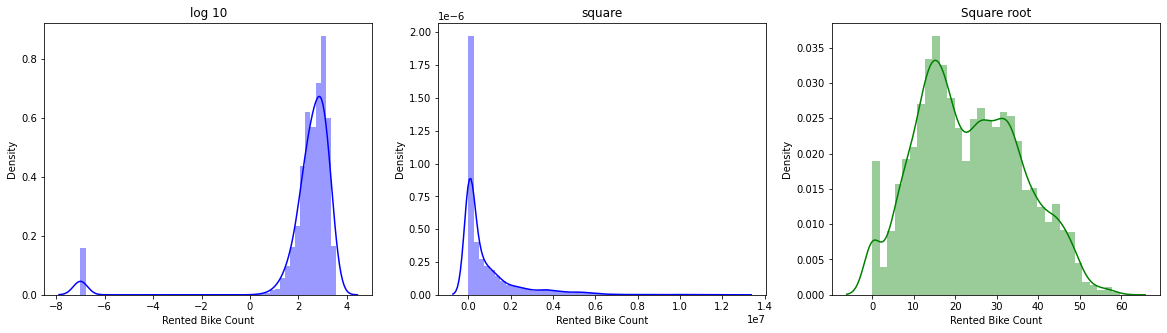

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='blue').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='blue').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")